**Generating wordclouds on depression and machine learning related publications**


In [ ]:
#Generating a word cloud on depression and machine learning related publications

#Scopus article search: used following keywords: (machine Learning AND predict* AND depression) in title
#screened out reviews, book chapters, clinical studies
#skimmed titles and abstract for relevance
#downloaded title, abstract and discussion text
#result 67 articles



In [ ]:
# Import the pandas library and alias it as 'pd'
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# Import the necessary libraries for data cleaning
import re  # Regular expressions library for text manipulation


# Read the data from a CSV file named "covid_vaccine.csv" into a DataFrame
df = pd.read_csv("equity2.csv", encoding='ISO-8859-1')


# Display the first few rows (head) of the DataFrame to inspect the data
df.head()

,title,abstract,discussion
0,A Machine Learning Approach to Predicting New-...,Objective: Depression is one of the most commo...,"To the best of our knowledge, this study is th..."
1,A machine learning ensemble to predict treatme...,Background Some Internet interventions are reg...,This study used an ensemble of random forests ...
2,A machine learning model for predicting blood ...,Aims: This study aimed to establish a predicti...,"In this study, we compared the prediction abil..."
3,A mobile health application to predict postpar...,Background: Postpartum depression (PPD) is a d...,The main contribution of this work is the deve...
4,Assessment and Prediction of Depression and An...,Background: Depression and anxiety symptoms in...,Principal Findings and Comparisons With Previo...


In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       67 non-null     object
 1   abstract    67 non-null     object
 2   discussion  67 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB
None


In [ ]:
#concatenate text from title, abstract and discussion section into one column

df['words'] = df['title'].astype(str) + df['abstract'].astype(str) + df['discussion'].astype(str)


In [ ]:
df.head()

,title,abstract,discussion,words
0,A Machine Learning Approach to Predicting New-...,Objective: Depression is one of the most commo...,"To the best of our knowledge, this study is th...",A Machine Learning Approach to Predicting New-...
1,A machine learning ensemble to predict treatme...,Background Some Internet interventions are reg...,This study used an ensemble of random forests ...,A machine learning ensemble to predict treatme...
2,A machine learning model for predicting blood ...,Aims: This study aimed to establish a predicti...,"In this study, we compared the prediction abil...",A machine learning model for predicting blood ...
3,A mobile health application to predict postpar...,Background: Postpartum depression (PPD) is a d...,The main contribution of this work is the deve...,A mobile health application to predict postpar...
4,Assessment and Prediction of Depression and An...,Background: Depression and anxiety symptoms in...,Principal Findings and Comparisons With Previo...,Assessment and Prediction of Depression and An...


**Removing contractions**

In [ ]:
#getting rid of contractions
!pip install contractions
import contractions

# Expand contractions in the 'tweet' column
df['words_expanded'] = df['words'].apply(lambda x: contractions.fix(x))
df.head()

,title,abstract,discussion,words,words_expanded
0,A Machine Learning Approach to Predicting New-...,Objective: Depression is one of the most commo...,"To the best of our knowledge, this study is th...",A Machine Learning Approach to Predicting New-...,A Machine Learning Approach to Predicting New-...
1,A machine learning ensemble to predict treatme...,Background Some Internet interventions are reg...,This study used an ensemble of random forests ...,A machine learning ensemble to predict treatme...,A machine learning ensemble to predict treatme...
2,A machine learning model for predicting blood ...,Aims: This study aimed to establish a predicti...,"In this study, we compared the prediction abil...",A machine learning model for predicting blood ...,A machine learning model for predicting blood ...
3,A mobile health application to predict postpar...,Background: Postpartum depression (PPD) is a d...,The main contribution of this work is the deve...,A mobile health application to predict postpar...,A mobile health application to predict postpar...
4,Assessment and Prediction of Depression and An...,Background: Depression and anxiety symptoms in...,Principal Findings and Comparisons With Previo...,Assessment and Prediction of Depression and An...,Assessment and Prediction of Depression and An...


**Data Cleaning**

In [ ]:
# Basic data cleaning tasks:
# - Lowercasing the texts
# - Removing URLs
# - Removing special characters and numbers

# Function to remove URLs
def remove_url(text):
    return re.sub(r'http\S+', '', text)


# Function to remove special characters and numbers
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z\s]', '', text)

# Perform the data cleaning
df['words'] = df['words_expanded'].str.lower()
df['words'] = df['words'].apply(remove_url)
df['words'] = df['words'].apply(remove_special_characters)

df.head()

,title,abstract,discussion,words,words_expanded
0,A Machine Learning Approach to Predicting New-...,Objective: Depression is one of the most commo...,"To the best of our knowledge, this study is th...",a machine learning approach to predicting newo...,A Machine Learning Approach to Predicting New-...
1,A machine learning ensemble to predict treatme...,Background Some Internet interventions are reg...,This study used an ensemble of random forests ...,a machine learning ensemble to predict treatme...,A machine learning ensemble to predict treatme...
2,A machine learning model for predicting blood ...,Aims: This study aimed to establish a predicti...,"In this study, we compared the prediction abil...",a machine learning model for predicting blood ...,A machine learning model for predicting blood ...
3,A mobile health application to predict postpar...,Background: Postpartum depression (PPD) is a d...,The main contribution of this work is the deve...,a mobile health application to predict postpar...,A mobile health application to predict postpar...
4,Assessment and Prediction of Depression and An...,Background: Depression and anxiety symptoms in...,Principal Findings and Comparisons With Previo...,assessment and prediction of depression and an...,Assessment and Prediction of Depression and An...


**Tokenization**

In [ ]:
#tokenization
# !pip install nltk
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
def tokenize_text(text):
   return word_tokenize(text)

In [ ]:
df['tokens'] = df['words'].apply(tokenize_text)
df.head()

,title,abstract,discussion,words,words_expanded,tokens
0,A Machine Learning Approach to Predicting New-...,Objective: Depression is one of the most commo...,"To the best of our knowledge, this study is th...",a machine learning approach to predicting newo...,A Machine Learning Approach to Predicting New-...,"[a, machine, learning, approach, to, predictin..."
1,A machine learning ensemble to predict treatme...,Background Some Internet interventions are reg...,This study used an ensemble of random forests ...,a machine learning ensemble to predict treatme...,A machine learning ensemble to predict treatme...,"[a, machine, learning, ensemble, to, predict, ..."
2,A machine learning model for predicting blood ...,Aims: This study aimed to establish a predicti...,"In this study, we compared the prediction abil...",a machine learning model for predicting blood ...,A machine learning model for predicting blood ...,"[a, machine, learning, model, for, predicting,..."
3,A mobile health application to predict postpar...,Background: Postpartum depression (PPD) is a d...,The main contribution of this work is the deve...,a mobile health application to predict postpar...,A mobile health application to predict postpar...,"[a, mobile, health, application, to, predict, ..."
4,Assessment and Prediction of Depression and An...,Background: Depression and anxiety symptoms in...,Principal Findings and Comparisons With Previo...,assessment and prediction of depression and an...,Assessment and Prediction of Depression and An...,"[assessment, and, prediction, of, depression, ..."


**Removing general stop words**

In [ ]:
#removing general stop words
# Import the 'stopwords' corpus from the Natural Language Toolkit (NLTK)
from nltk.corpus import stopwords

# Download the set of stopwords from NLTK. This is necessary the first time you run this code.
nltk.download('stopwords')

# Define a function that removes stop words from a list of tokens.
# Stop words are common words that are usually filtered out in NLP tasks.
def remove_stop_words(tokens):
    # Create a set of English stop words. Sets are faster for membership tests than lists.
    stop_words_set = set(stopwords.words('english'))

    # Return a new list that contains only the tokens that are not stop words.
    # The token is also converted to lowercase to ensure case-insensitive matching.
    return [token for token in tokens if token.lower() not in stop_words_set]

# Apply the 'remove_stop_words' function to the 'tokens' column of the dataframe 'df'.
# The result is a new column 'tokens_no_stop' in the dataframe 'df'.
df['tokens_no_stop'] = df['tokens'].apply(remove_stop_words)

# Display the first few rows of the DataFrame showing the 'tweet', 'tokens', and 'tokens_no_stop' columns.
# This gives a visual comparison between the original tokens and the tokens after stop words removal.
df[['words', 'tokens', 'tokens_no_stop']].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,words,tokens,tokens_no_stop
0,a machine learning approach to predicting newo...,"[a, machine, learning, approach, to, predictin...","[machine, learning, approach, predicting, newo..."
1,a machine learning ensemble to predict treatme...,"[a, machine, learning, ensemble, to, predict, ...","[machine, learning, ensemble, predict, treatme..."
2,a machine learning model for predicting blood ...,"[a, machine, learning, model, for, predicting,...","[machine, learning, model, predicting, blood, ..."
3,a mobile health application to predict postpar...,"[a, mobile, health, application, to, predict, ...","[mobile, health, application, predict, postpar..."
4,assessment and prediction of depression and an...,"[assessment, and, prediction, of, depression, ...","[assessment, prediction, depression, anxiety, ..."


**Removing context stop words**


In [ ]:
#removing context stop words
# Define additional context-sensitive stop words
context_sensitive_stop_words = set([
    'aims', 'algorithm', 'analysis', 'application', 'approach', 'author', 'background',
    'causes', 'classification', 'conclusion', 'context', 'copyright', 'data', 'dataset', 'deep',
    'learning', 'depression', 'depressive', 'design', 'discussion', 'emotional', 'et', 'al',
    'evaluation', 'feature', 'figure', 'findings', 'hypothesis', 'intervention', 'limitations',
    'machine', 'learning', 'methodology', 'methods', 'model', 'mood',
    'disorder', 'neural', 'network', 'objective', 'outcome', 'outcome', 'variable', 'performance',
    'predict', 'predicted', 'predicting', 'prediction', 'predicts', 'psychological', 'regression',
    'research', 'design', 'result', 'results', 'review', 'statistical', 'statistical',
    'analysis', 'study', 'symptoms', 'testing', 'training', 'treatment', 'variable',
    'use', 'may', 'models', 'variables', 'features', 'used', 'outcomes', 'patients', 'patient',
    'predictive', 'participant', 'using', 'indiviudal', 'individual', 'among','predictor',
    'found', 'factor', 'important', 'ml', 'predictors', 'identified',
    'participants','algorithms','based','associated','including','measure','individuals','factors',
    'show','high','different', 'level', 'random forest', 'forest'
]) #can add more words here

# English stop words
stop_words_set = set(stopwords.words('english'))

# Extend the previously defined function to remove both general and context-sensitive stop words
def remove_context_sensitive_stop_words(tokens):
    # Combine the general English stop words with the context-specific stop words
    # to create a comprehensive set of words to filter out.
    all_stop_words = stop_words_set | context_sensitive_stop_words
    return [token for token in tokens if token.lower() not in all_stop_words]

# Apply the updated function to remove both general and context-sensitive stop words
df['tokens_no_stop_context'] = df['tokens'].apply(remove_context_sensitive_stop_words)

# Display the DataFrame
df[['words', 'tokens', 'tokens_no_stop_context']].head()

,words,tokens,tokens_no_stop_context
0,a machine learning approach to predicting newo...,"[a, machine, learning, approach, to, predictin...","[newonset, military, populationobjective, one,..."
1,a machine learning ensemble to predict treatme...,"[a, machine, learning, ensemble, to, predict, ...","[ensemble, following, internet, depressionback..."
2,a machine learning model for predicting blood ...,"[a, machine, learning, model, for, predicting,...","[blood, concentration, quetiapine, schizophren..."
3,a mobile health application to predict postpar...,"[a, mobile, health, application, to, predict, ...","[mobile, health, postpartum, learningbackgroun..."
4,assessment and prediction of depression and an...,"[assessment, and, prediction, of, depression, ...","[assessment, anxiety, risk, schoolchildren, te..."


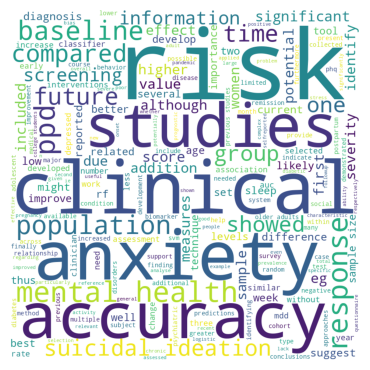

In [ ]:
#wordcloud with tokenized data
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt



# Combine all tokens from the 'tokens_no_stop_context' column into a single list
# Remove .head(5000) to generate the word cloud for the entire dataset
all_tokens = sum(df['tokens_no_stop_context'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='viridis',  # Use the 'viridis' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.5, 3.5), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**Lemmatization**

In [ ]:
#lemmatization
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Download necessary NLTK data
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

# Function to map NLTK position tags to WordNet tags
def get_wordnet_pos(word, pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize a list of tokens with POS tags
def lemmatize_tokens_with_pos(tokens):
    tagged_tokens = nltk.pos_tag(tokens)
    return [lemmatizer.lemmatize(word, get_wordnet_pos(word, tag)) for word, tag in tagged_tokens]

# Apply this function to the 'tokens' column
df['lemmatized'] = df['tokens_no_stop_context'].apply(lemmatize_tokens_with_pos)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Display the DataFrame
df[['words', 'tokens_no_stop_context', 'lemmatized']].head()

,words,tokens_no_stop_context,lemmatized
0,a machine learning approach to predicting newo...,"[newonset, military, populationobjective, one,...","[newonset, military, populationobjective, one,..."
1,a machine learning ensemble to predict treatme...,"[ensemble, following, internet, depressionback...","[ensemble, follow, internet, depressionbackgro..."
2,a machine learning model for predicting blood ...,"[blood, concentration, quetiapine, schizophren...","[blood, concentration, quetiapine, schizophren..."
3,a mobile health application to predict postpar...,"[mobile, health, postpartum, learningbackgroun...","[mobile, health, postpartum, learningbackgroun..."
4,assessment and prediction of depression and an...,"[assessment, anxiety, risk, schoolchildren, te...","[assessment, anxiety, risk, schoolchildren, te..."


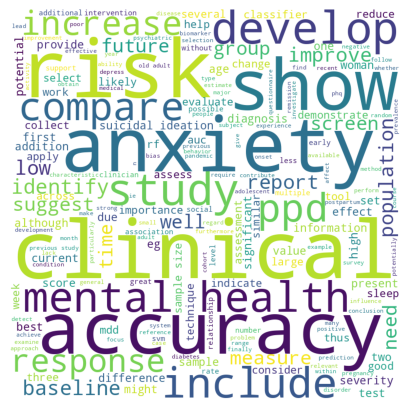

In [ ]:
# !pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens from the 'lemmatized' column into a single list
all_tokens = sum(df['lemmatized'].head(5000).tolist(), [])

# Create a text string required by WordCloud
text = ' '.join(all_tokens)

# Create a WordCloud object
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      colormap='viridis',  # Use the 'viridis' colormap
                      min_font_size = 10).generate(text)

# Plot the WordCloud image
plt.figure(figsize = (3.9, 3.9), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()